In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle

In [10]:
df = pd.read_csv("encoders.csv")
df.head()

,id,date,scanner,min,max,err,pixels,minf,maxf,errf,created_at,updated_at
0,12,2017-12-17,K219,35435,35933,1.40,6,35681,35688,0.02,NaN,2017-12-29 16:26:16.475205
1,30,2017-12-18,H161,35155,36382,3.43,14,35731,35761,0.08,NaN,2017-12-29 16:26:16.872783
2,47,2017-12-18,K211,35305,36042,2.07,43,35692,35739,0.13,NaN,2017-12-19 18:10:57.453846
3,48,2017-12-18,K212,35216,36225,2.82,61,35686,35726,0.11,NaN,2017-12-19 18:10:57.45983
4,49,2017-12-18,K220,35196,36259,2.98,11,35709,35724,0.04,NaN,2017-12-19 18:10:57.464388


In [11]:

df[["difference"]]= df[['err']].apply(lambda x: x-12)

df.drop(labels=["created_at","minf","maxf","errf"],inplace=True,axis="columns")


df.at[304, 'min'] = 33509
df.at[1553, 'updated_at'] = '2018-01-25 23:23:40.893050' 
df.at[586, 'updated_at'] = '2018-01-04 12:38:43.729483' 
df.at[601, 'updated_at'] = '2018-01-04 12:38:43.729483'


df['date'] = pd.to_datetime(df['date'])
df['updated_at'] = pd.to_datetime(df['updated_at'])

df['days_diff'] = df['updated_at'] - df['date']

df['days_diff'] = df.days_diff.astype('object')

df['days_diff'] = df["days_diff"].apply(lambda x:str(x)[:2])

df = df.apply(lambda x:x.replace(-0.0,np.NaN))
df = df.apply(lambda x:x.replace(-1,np.NaN))
df = df.apply(lambda x:x.replace('Na',np.NaN))
df = df.apply(lambda x:x.replace('NaT',np.NaN))

df.dropna(axis="rows",inplace=True)


df['days_diff'] = df["days_diff"].astype('int64')


def sur_cal_new(x):
  
    if x > -2:
      return 4

    elif -2 >= x and x >= -4:
      return 8

    elif -4 >= x >= -6 :
      return 20

    elif -6 >= x >= -8:
      return 28

    elif -8 >= x >=-10 :
      return 35

    elif -10 >= x >=-12 :
      return 38

    elif -12 >= x >=-14 :
      return 42

    else:
      return 0



In [14]:
df["survival"] = df["difference"].apply(lambda x: sur_cal_new(x))


#df.at[[304, 586, 601, 1446, 1512, 1553, 1766, 1771],'survival'] = (df[df['difference']>0]['days_diff'].values) *  -1

# Calculate the values to be assigned
values_to_assign = (df[df['difference'] > 0]['days_diff'].values) * -1

# Identify the indices where you want to assign these values
indices_to_assign = [304, 586, 601, 1446, 1512, 1553, 1766, 1771]

# Assign values using boolean indexing
df.loc[indices_to_assign, 'survival'] = values_to_assign

In [17]:
df.head()

,min,max,err,pixels,survival
0,35435.0,35933.0,1.40,6.0,38
1,35155.0,36382.0,3.43,14.0,35
2,35305.0,36042.0,2.07,43.0,35
3,35216.0,36225.0,2.82,61.0,35
4,35196.0,36259.0,2.98,11.0,35


In [22]:
# df1= df

# cdfetrzdfdf

# del df['days_diff']
# del df['difference']
# del df['updated_at']
# del df['date']
# del df['scanner']
# del df['id']




X = df.drop(labels='survival', axis=1)
y = df['survival']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)





model = RandomForestRegressor()

model.fit(X_train,y_train)

y_pred = model_RTR.predict(X_test)
print(y_pred)

[35.   35.   35.   35.   35.   35.   38.   35.   35.   35.   35.   38.
 20.   35.   38.   38.   35.   35.   35.   35.   20.   38.   38.   38.
 38.   28.    8.   35.   35.   35.   35.   38.   38.   35.   38.   35.
 35.   35.   35.   35.   35.   35.   38.   38.   38.   35.   35.   35.
 35.   35.   38.   28.   38.   35.   35.   35.   35.   35.   38.   38.
 35.   38.   35.   35.   38.   38.   35.   35.   28.   35.   35.   35.
 35.   35.   38.   35.   28.   38.   35.   35.   35.   35.   38.   35.
 28.   38.   28.   -5.9  35.   35.   35.   38.   35.   35.   35.   38.
 35.   38.   35.   35.   35.   35.   35.   38.   35.   35.   38.   35.
 35.   38.   35.   35.   38.   35.   35.   38.   35.   38.   38.   20.72
 38.   38.   38.   38.   35.    8.   38.   38.   35.   -2.13 35.   35.
 28.   35.   35.   38.   38.   35.   35.    8.   35.   35.    8.   35.
 35.   38.   35.   35.   35.   38.   38.   38.   35.   35.   38.   35.
 28.   35.   35.   35.   35.   35.   38.   35.   35.   38.   38.   35.
 35.

In [23]:
print('MSE for model',mean_squared_error(y_test,y_pred))
print("R2 score for model",r2_score(y_test,y_pred))

MSE for model 0.8717604130808951
R2 score for model 0.9767350747117067


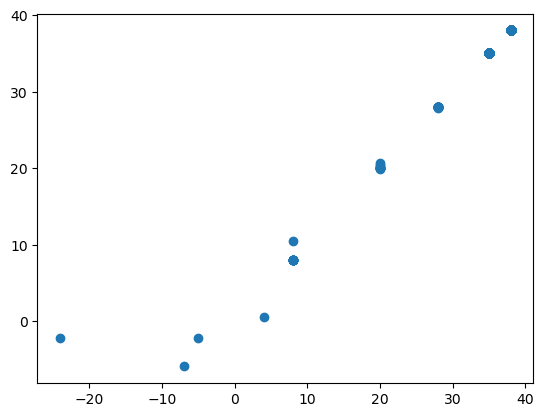

In [24]:
plt.scatter(x=y_test,y=y_pred)

In [29]:
import pickle

In [30]:
filename = 'predictive_maintainance.sav'
pickle.dump(model, open('filename', 'wb'))

In [32]:
pickle_out = open('predictive_maintainance', 'wb')
pickle.dump(model, pickle_out)
pickle_out.close()

In [ ]:
# import pandas as pd
# import numpy as np
# import pickle

# # Load the trained model
# Lap_model = pickle.load(open('predictive_maintainance', 'rb'))

# # Define input data
# input_data = [0,110, 1110, 1230, 1230, 0, 0, 330, 0, 440, 0, 10, 10, 0]
# input_data_as_numpy_array = np.asarray(input_data)
# input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# # Make predictions
# prediction = Lap_model.predict(input_data_reshaped)

# # Set threshold
# threshold = 0.5
# print(prediction)

# # Convert to binary prediction
# if prediction > threshold:
#     print("most likely to buy the product")
# else:
#     print("less chances of buying the product")
